In [241]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

# Data Preprocessing

load each dataset https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022 

In [242]:
data_dir =  os.path.join(os.getcwd(), '..', 'data')

variant = "var5"

df = pd.read_csv(os.path.join(data_dir, f"{variant}.csv"))
df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,x1,x2
count,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.00000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000,1000000.000000,1000000.000000
mean,0.011030,0.578958,4.875269e-01,14.744036,99.187295,41.34948,9.164764e-01,8.571482,1517.471615,5490.939853,...,0.248917,551.037350,0.023991,7.817692,0.556301,1.022276,0.0,3.658708,0.010499,0.008503
std,0.104443,0.288226,2.913674e-01,43.134138,94.070293,13.75192,5.068976e+00,20.544640,965.945989,2940.124992,...,0.432386,506.530093,0.153021,8.259055,0.496820,0.192862,0.0,2.116726,1.010044,1.009068
min,0.000000,0.100000,7.898994e-07,-1.000000,-1.000000,10.00000,1.414624e-07,-15.710457,1.000000,-143.649721,...,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000,-4.977864,-4.846414
25%,0.000000,0.300000,2.145294e-01,-1.000000,27.000000,30.00000,7.451458e-03,-1.178938,885.000000,3332.981127,...,0.000000,200.000000,0.000000,3.151601,0.000000,1.000000,0.0,2.000000,-0.669626,-0.670979
50%,0.000000,0.600000,4.858928e-01,-1.000000,64.000000,50.00000,1.567347e-02,-0.833821,1208.000000,5190.722819,...,0.000000,200.000000,0.000000,5.246432,1.000000,1.000000,0.0,4.000000,0.005114,0.003902
75%,0.000000,0.800000,7.545309e-01,-1.000000,154.000000,50.00000,2.698820e-02,-0.052483,1846.000000,7371.559084,...,0.000000,1000.000000,0.000000,9.362126,1.000000,1.000000,0.0,5.000000,0.683212,0.680875
max,1.000000,0.900000,9.999997e-01,384.000000,426.000000,90.00000,7.784555e+01,113.086228,6830.000000,16802.052304,...,1.000000,2100.000000,1.000000,83.213536,1.000000,2.000000,0.0,7.000000,6.434867,6.542492


drop device_fraud_count because it is always 0

In [243]:
df = df.drop(['device_fraud_count'], axis=1)

Turn categoricial data from str into int

In [244]:
categorical_fileds = ["payment_type", "employment_status", "housing_status", "source", "device_os"]
categorical_mappings = []
for field in categorical_fileds:
    unique_values = df[field].unique()
    data_maping = {}

    for i in range(len(unique_values)):
        data_maping[unique_values[i]] = i
    
    df[field] = df[field].map(data_maping)
    categorical_mappings.append(data_maping)

Scale all features that are not boolean or categorical

In [245]:
bool_fields = []

for col in df.columns:
    if df[col].nunique() == 2:
        bool_fields.append(col)
    print(f"{col}:" ,df[col].nunique())

fraud_bool: 2
income: 9
name_email_similarity: 998774
prev_address_months_count: 371
current_address_months_count: 418
customer_age: 9
days_since_request: 988760
intended_balcon_amount: 994706
payment_type: 5
zip_count_4w: 6279
velocity_6h: 998692
velocity_24h: 998884
velocity_4w: 998081
bank_branch_count_8w: 2329
date_of_birth_distinct_emails_4w: 38
employment_status: 7
credit_risk_score: 548
email_is_free: 2
housing_status: 7
phone_home_valid: 2
phone_mobile_valid: 2
bank_months_count: 33
has_other_cards: 2
proposed_credit_limit: 12
foreign_request: 2
source: 2
session_length_in_minutes: 995002
device_os: 5
keep_alive_session: 2
device_distinct_emails_8w: 4
month: 8
x1: 998837
x2: 998837


In [246]:
pre_scaled = ["income","customer_age" "payment_type", "employment_status", "housing_status", "source", "device_os", "month"]
pre_scaled.extend(bool_fields)

In [247]:
for col in df.columns:
    if col not in pre_scaled:
        df[col] = StandardScaler().fit_transform(df[col].values.reshape(-1, 1))

In [248]:
df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month,x1,x2
count,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,...,1.000000e+06,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1.000000e+06,1.000000e+06
mean,0.011030,0.578958,-6.263745e-16,5.143619e-17,-6.954792e-17,3.767653e-17,-6.473044e-17,-4.587264e-17,-1.848832e-17,-4.291678e-17,...,9.201528e-17,0.023991,0.007670,-3.143583e-16,1.087802,0.556301,1.709992e-16,3.658708,-2.071232e-17,5.774936e-18
std,0.104443,0.288226,1.000001e+00,1.000000e+00,1.000001e+00,1.000000e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,0.153021,0.087242,1.000001e+00,0.950763,0.496820,1.000001e+00,2.116726,1.000001e+00,1.000001e+00
min,0.000000,0.100000,-1.673236e+00,-3.650019e-01,-1.065026e+00,-2.279645e+00,-1.808011e-01,-1.181912e+00,-1.485894e+00,-1.569935e+00,...,-7.127662e-01,0.000000,0.000000,-1.067640e+00,0.000000,0.000000,-1.048561e+01,0.000000,-4.938762e+00,-4.811289e+00
25%,0.000000,0.300000,-9.369535e-01,-3.650019e-01,-7.673765e-01,-8.253019e-01,-1.793311e-01,-4.745970e-01,-5.817725e-01,-6.547695e-01,...,-6.930240e-01,0.000000,0.000000,-5.649670e-01,0.000000,0.000000,-1.155022e-01,2.000000,-6.733626e-01,-6.733757e-01
50%,0.000000,0.600000,-5.608293e-03,-3.650019e-01,-3.740534e-01,6.290412e-01,-1.777091e-01,-4.577987e-01,3.223492e-01,-3.203821e-01,...,-6.930240e-01,0.000000,0.000000,-3.113264e-01,1.000000,1.000000,-1.155022e-01,4.000000,-5.331891e-03,-4.559032e-03
75%,0.000000,0.800000,9.163831e-01,-3.650019e-01,5.826785e-01,6.290412e-01,-1.754770e-01,-4.197674e-01,3.223492e-01,3.401107e-01,...,8.863499e-01,0.000000,0.000000,1.869989e-01,2.000000,1.000000,-1.155022e-01,5.000000,6.660237e-01,6.663297e-01
max,1.000000,0.900000,1.758855e+00,8.560648e+00,3.474135e+00,3.537728e+00,1.517646e+01,5.087205e+00,2.130593e+00,5.499822e+00,...,3.057989e+00,1.000000,1.000000,9.128875e+00,4.000000,1.000000,5.069550e+00,7.000000,6.360488e+00,6.475273e+00


# Sampling

In [249]:
df_fraud = df[df['fraud_bool'] == 1]
df_not_fraud = df[df['fraud_bool'] == 0]

print(f"Fraud: {len(df_fraud)}")
print(f"Not Fraud: {len(df_not_fraud)}")

Fraud: 11030
Not Fraud: 988970


In [250]:
sampled_df = pd.concat([df_fraud, df_not_fraud.sample(n=len(df_fraud))])
sampled_df = sampled_df.sample(frac=1).reset_index(drop=True)
print(f"Sampled: {len(sampled_df)}")

Sampled: 22060


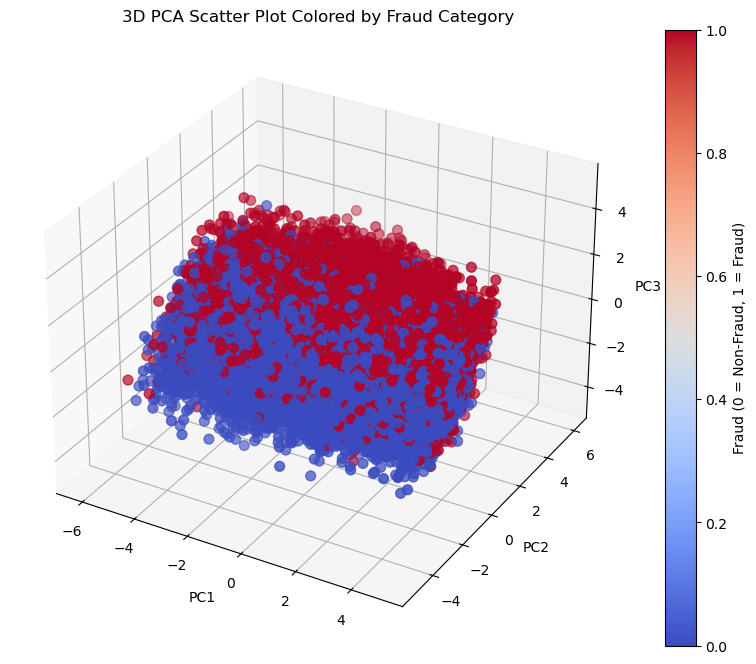

In [251]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(sampled_df)

# Step 3: Create a 3D scatter plot, coloring points based on fraud_bool
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Use 'fraud_bool' to color the points (1 for fraud, 0 for non-fraud)
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=sampled_df["fraud_bool"], cmap='coolwarm', marker='o', s=50)

# Labeling the axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Title
ax.set_title('3D PCA Scatter Plot Colored by Fraud Category')

# Add colorbar to show fraud categories (0 = non-fraud, 1 = fraud)
cbar = fig.colorbar(scatter)
cbar.set_label('Fraud (0 = Non-Fraud, 1 = Fraud)')
plt.savefig(f"{variant}_3d_pca.png")

# Show the plot
plt.show()

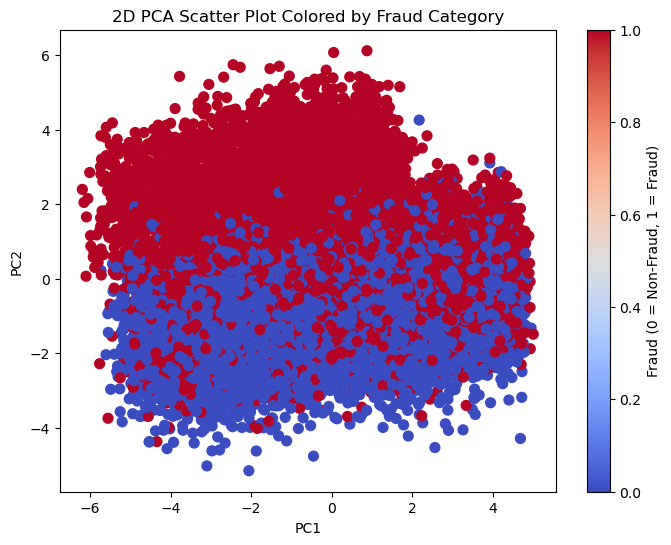

In [252]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(sampled_df)

# Step 3: Create a 2D scatter plot, coloring points based on fraud_bool
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=sampled_df["fraud_bool"], cmap='coolwarm', marker='o', s=50)

# Labeling the axes
plt.xlabel('PC1')
plt.ylabel('PC2')

# Title
plt.title('2D PCA Scatter Plot Colored by Fraud Category')

# Add colorbar to show fraud categories (0 = non-fraud, 1 = fraud)
cbar = plt.colorbar(scatter)
cbar.set_label('Fraud (0 = Non-Fraud, 1 = Fraud)')
plt.savefig(f"{variant}_2d_pca.png")

# Show the plot
plt.show()

# Create Models

In [253]:
X = sampled_df.drop(['fraud_bool'], axis=1)
Y = sampled_df['fraud_bool']

# DBSCAN

In [254]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3, min_samples=5, n_jobs=-1)
labels = dbscan.fit_predict(X)

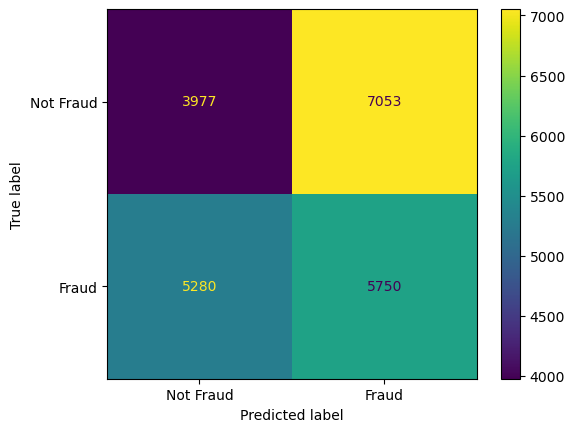

[[3977 7053]
 [5280 5750]]


In [255]:
res = X.copy()
res['cluster'] = labels
res['fraud_bool'] = Y

res = res[['cluster', 'fraud_bool']]
res['cluster'] = res['cluster'].apply(lambda x: 1 if x == -1 else 0)

cm = confusion_matrix(res['fraud_bool'], res['cluster'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot()
#plt.savefig(f'dbscan_{variant}.png')
plt.show()
print(cm)

# Create the KMeans model

In [256]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)

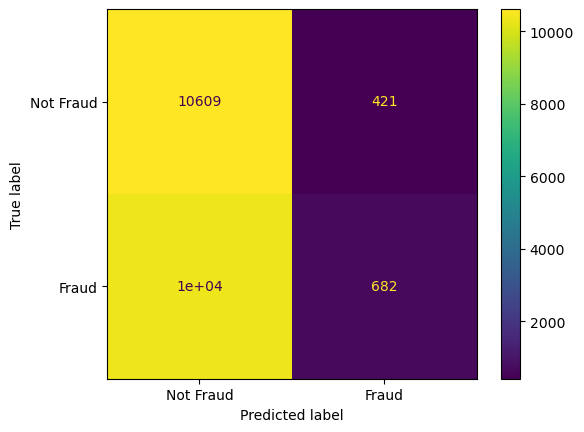

[[10609   421]
 [10348   682]]


In [257]:
distances = np.linalg.norm(X - kmeans.cluster_centers_[kmeans.labels_], axis=1)
threshold = np.percentile(distances, 95)
outliers = np.where(distances > threshold)[0]

res = X.copy()
res['cluster'] = X.index.isin(outliers)
res['fraud_bool'] = Y

res = res[['cluster', 'fraud_bool']]
res['cluster'] = res['cluster'].apply(lambda x: 1 if x else 0)

cm = confusion_matrix(res['fraud_bool'], res['cluster'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot()
#plt.savefig(f'kmeans_dist_{variant}.png')
plt.show()
print(cm)